In [7]:
import pandas as pd
customers = pd.read_csv('/Users/endru/Desktop/data/customers.csv')
orders = pd.read_csv('/Users/endru/Desktop/data/orders.csv')
print("Customers head:\n", customers.head())
print("\nOrders head:\n", orders.head())

Customers head:
    customer_id   customer_name  gender  age  home_address  zip_code  \
0            1        John Doe    Male   28    123 Elm St     12345   
1            2      Jane Smith  Female   34    456 Oak St     12346   
2            3     Bob Johnson    Male   45   789 Pine St     12347   
3            4  Alice Williams  Female   29  321 Maple St     12348   
4            5   Charlie Brown    Male   38  654 Cedar St     12349   

          city state country  
0  Springfield    AL     USA  
1   Birmingham    AL     USA  
2   Montgomery    AL     USA  
3   Huntsville    AL     USA  
4   Tuscaloosa    AL     USA  

Orders head:
    order_id  customer_id      payment  order_date delivery_date
0         1            1  Credit Card  2023-01-15    2023-01-20
1         2            2       PayPal  2023-01-16    2023-01-21
2         3            3  Credit Card  2023-01-17    2023-01-22
3         4            4   Debit Card  2023-01-18    2023-01-23
4         5            5  Credit Ca

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
#Task 1
import pandas as pd
customers = pd.read_csv('/Users/endru/Desktop/data/customers.csv')
orders = pd.read_csv('/Users/endru/Desktop/data/orders.csv')
joined_df = pd.merge(customers, orders, on='customer_id', how='inner')
print("Task 1: Joined Dataset")
print(joined_df.head())

Task 1: Joined Dataset
   customer_id customer_name  gender  age home_address  zip_code         city  \
0            1      John Doe    Male   28   123 Elm St     12345  Springfield   
1            1      John Doe    Male   28   123 Elm St     12345  Springfield   
2            2    Jane Smith  Female   34   456 Oak St     12346   Birmingham   
3            2    Jane Smith  Female   34   456 Oak St     12346   Birmingham   
4            3   Bob Johnson    Male   45  789 Pine St     12347   Montgomery   

  state country  order_id      payment  order_date delivery_date  
0    AL     USA         1  Credit Card  2023-01-15    2023-01-20  
1    AL     USA        31  Credit Card  2023-02-14    2023-02-19  
2    AL     USA         2       PayPal  2023-01-16    2023-01-21  
3    AL     USA        32       PayPal  2023-02-15    2023-02-20  
4    AL     USA         3  Credit Card  2023-01-17    2023-01-22  


Task 1: Joined Dataset
   customer_id customer_name  gender  age home_address  zip_code         city  \
0            1      John Doe    Male   28   123 Elm St     12345  Springfield   
1            1      John Doe    Male   28   123 Elm St     12345  Springfield   
2            2    Jane Smith  Female   34   456 Oak St     12346   Birmingham   
3            2    Jane Smith  Female   34   456 Oak St     12346   Birmingham   
4            3   Bob Johnson    Male   45  789 Pine St     12347   Montgomery   

  state country  order_id      payment  order_date delivery_date  
0    AL     USA         1  Credit Card  2023-01-15    2023-01-20  
1    AL     USA        31  Credit Card  2023-02-14    2023-02-19  
2    AL     USA         2       PayPal  2023-01-16    2023-01-21  
3    AL     USA        32       PayPal  2023-02-15    2023-02-20  
4    AL     USA         3  Credit Card  2023-01-17    2023-01-22  


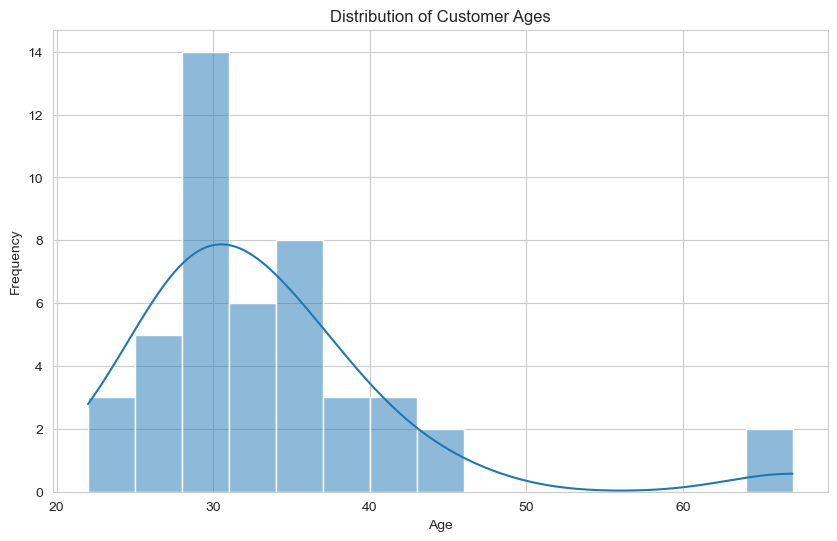

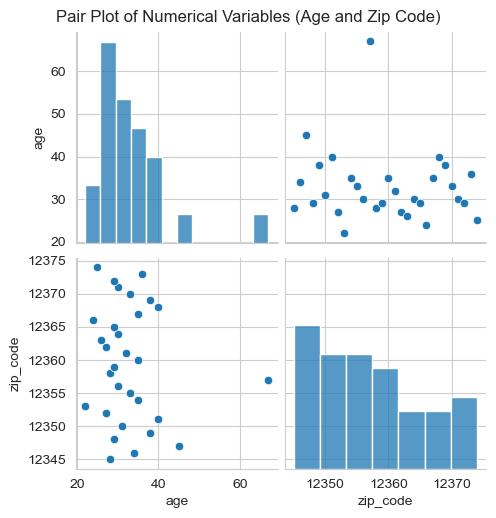

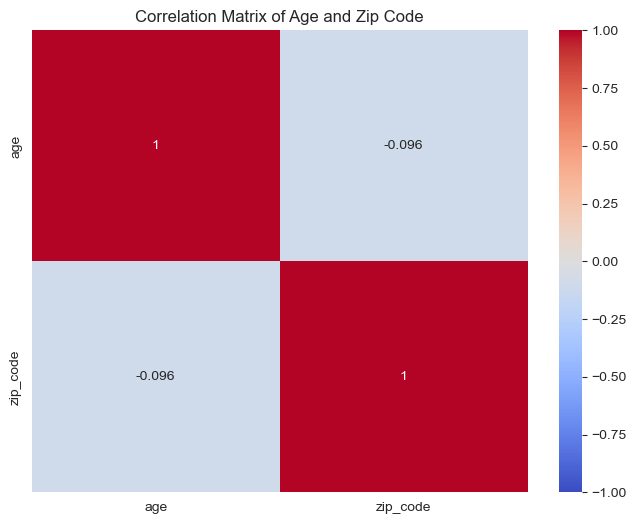

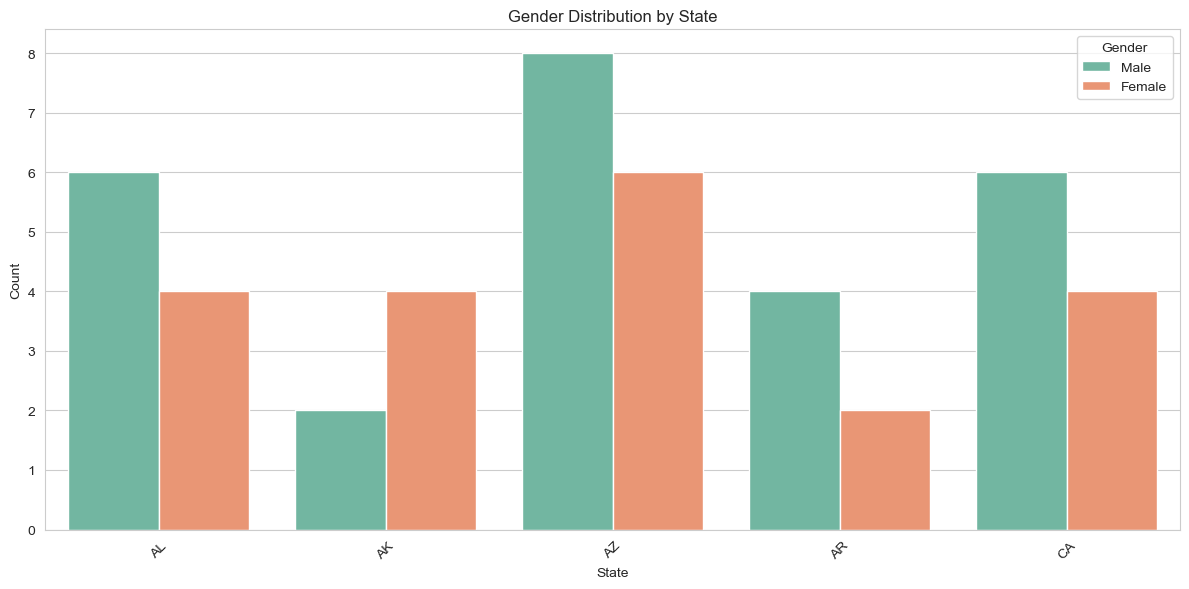

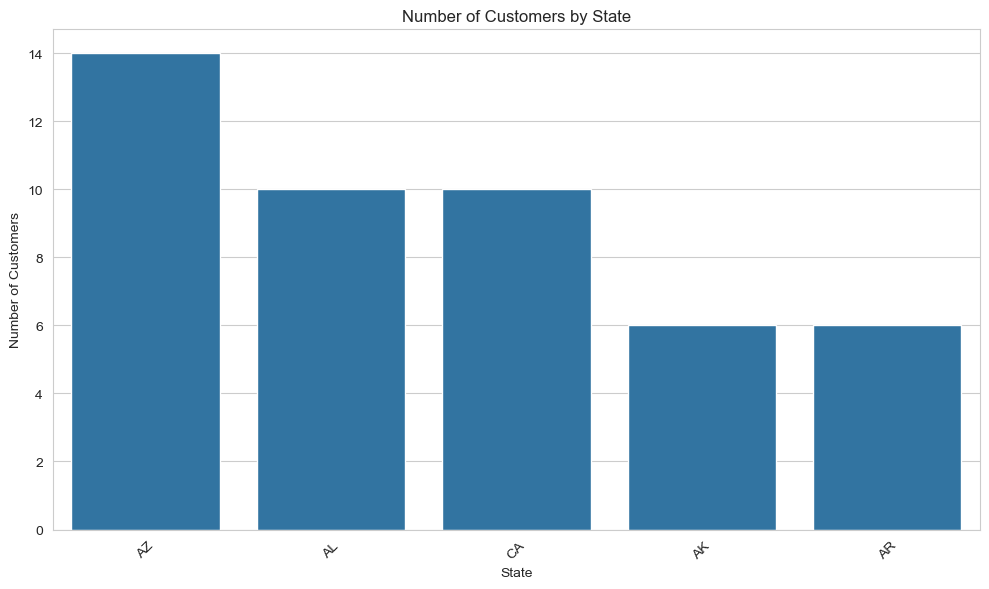

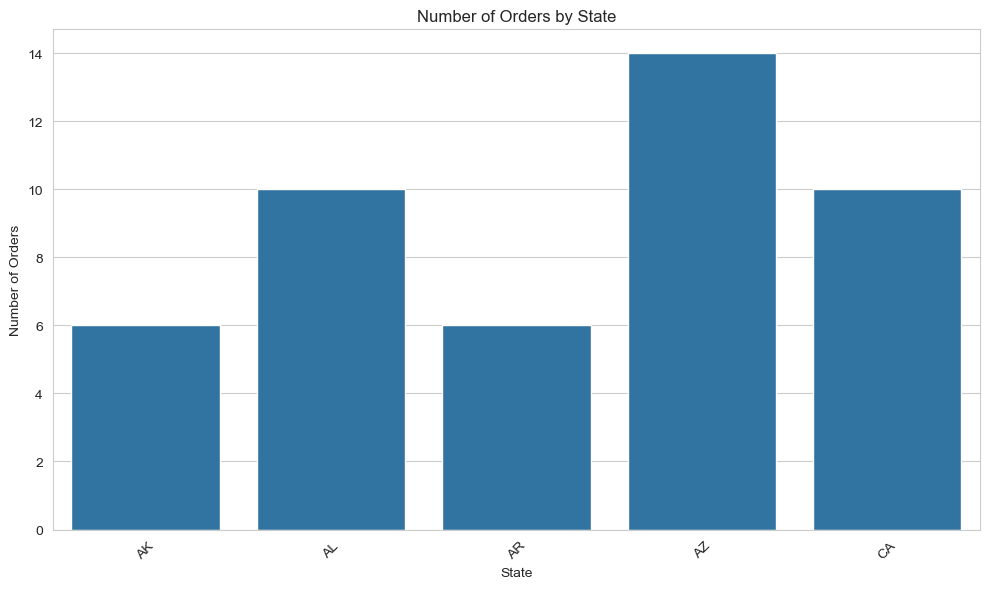

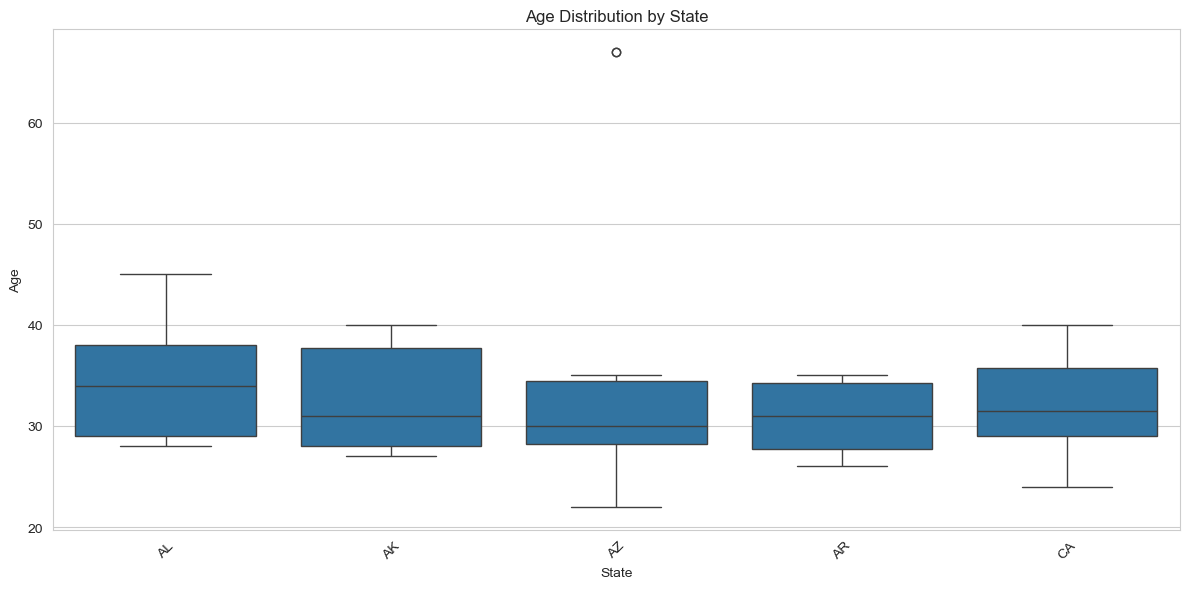

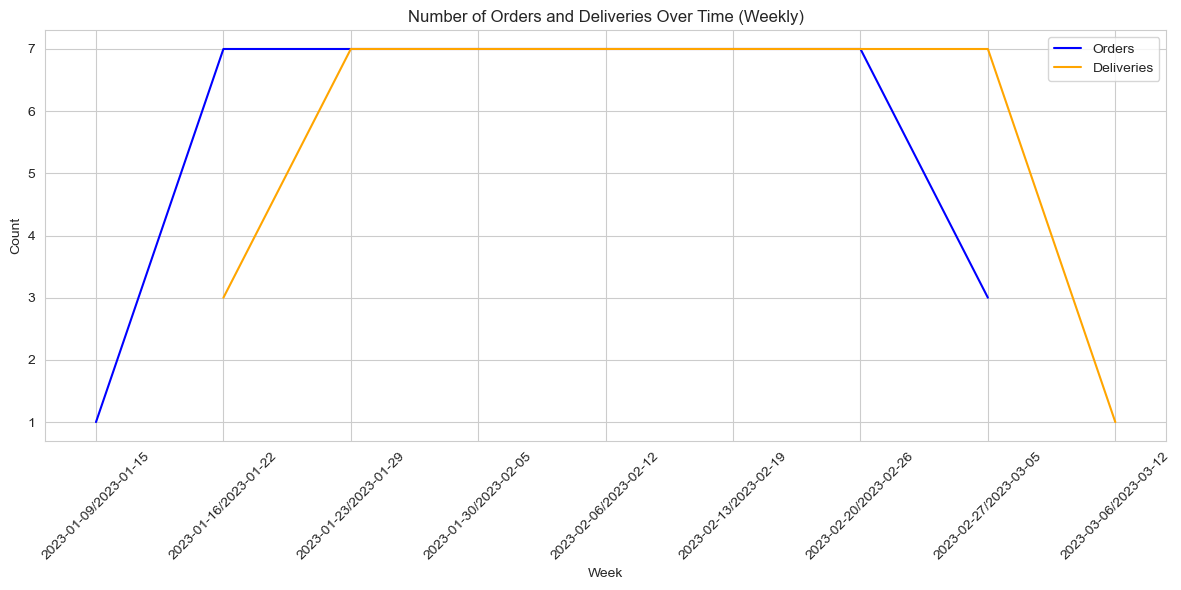

In [12]:
#Task 2 and Task 9
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

customers = pd.read_csv('/Users/endru/Desktop/data/customers.csv')
orders = pd.read_csv('/Users/endru/Desktop/data/orders.csv')
joined_df = pd.merge(customers, orders, on='customer_id', how='inner')
print("Task 1: Joined Dataset")
print(joined_df.head())

plt.figure(figsize=(10, 6))
sns.histplot(data=joined_df, x='age', bins=15, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

numerical_cols = ['age', 'zip_code']
sns.pairplot(joined_df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables (Age and Zip Code)', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
corr_matrix = joined_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Age and Zip Code')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=joined_df, x='state', hue='gender', palette='Set2')
plt.title('Gender Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
customer_counts = joined_df['state'].value_counts()
sns.barplot(x=customer_counts.index, y=customer_counts.values)
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
order_counts = joined_df.groupby('state')['order_id'].count()
sns.barplot(x=order_counts.index, y=order_counts.values)
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=joined_df, x='state', y='age')
plt.title('Age Distribution by State')
plt.xlabel('State')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

joined_df['order_date'] = pd.to_datetime(joined_df['order_date'])
joined_df['delivery_date'] = pd.to_datetime(joined_df['delivery_date'])
orders_over_time = joined_df.groupby(joined_df['order_date'].dt.to_period('W'))['order_id'].count()
deliveries_over_time = joined_df.groupby(joined_df['delivery_date'].dt.to_period('W'))['order_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(orders_over_time.index.astype(str), orders_over_time.values, label='Orders', color='blue')
plt.plot(deliveries_over_time.index.astype(str), deliveries_over_time.values, label='Deliveries', color='orange')
plt.title('Number of Orders and Deliveries Over Time (Weekly)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()